In [1]:
import pandas as pd 

from IPython.display import display

import matplotlib.pyplot as plt

import seaborn as sns

from pymystem3 import Mystem

# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Вспомогательные-функции" data-toc-modified-id="Вспомогательные-функции-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Вспомогательные функции</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Первичное-ознакомление-с-данными" data-toc-modified-id="Первичное-ознакомление-с-данными-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Первичное ознакомление с данными</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков-" data-toc-modified-id="Обработка-пропусков--4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Обработка пропусков <a class="anchor" id="second-bullet"></a></a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Замена типа данных</a></span></li><li><span><a href="#Обработка-дубликатов-" data-toc-modified-id="Обработка-дубликатов--4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Обработка дубликатов <a class="anchor" id="fourth-bullet"></a></a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Лемматизация-" data-toc-modified-id="Лемматизация--4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Лемматизация <a class="anchor" id="fifth-bullet"></a></a></span></li><li><span><a href="#Категоризация-данных-" data-toc-modified-id="Категоризация-данных--4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Категоризация данных <a class="anchor" id="sixth-bullet"></a></a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-полученных-данных-и-выводы-" data-toc-modified-id="Анализ-полученных-данных-и-выводы--5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ полученных данных и выводы <a class="anchor" id="seventh-bullet"></a></a></span><ul class="toc-item"><li><span><a href="#Есть-ли-зависимость-между-наличием-детей-и-возвратом-кредита-в-срок?" data-toc-modified-id="Есть-ли-зависимость-между-наличием-детей-и-возвратом-кредита-в-срок?-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Есть ли зависимость между наличием детей и возвратом кредита в срок?</a></span></li><li><span><a href="#Есть-ли-зависимость-между-семейным-положением-и-возвратом-кредита-в-срок?" data-toc-modified-id="Есть-ли-зависимость-между-семейным-положением-и-возвратом-кредита-в-срок?-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Есть ли зависимость между семейным положением и возвратом кредита в срок?</a></span></li><li><span><a href="#Есть-ли-зависимость-между-уровнем-дохода-и-возвратом-кредита-в-срок?" data-toc-modified-id="Есть-ли-зависимость-между-уровнем-дохода-и-возвратом-кредита-в-срок?-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Есть ли зависимость между уровнем дохода и возвратом кредита в срок?</a></span></li><li><span><a href="#Как-разные-цели-кредита-влияют-на-его-возврат-в-срок?" data-toc-modified-id="Как-разные-цели-кредита-влияют-на-его-возврат-в-срок?-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Как разные цели кредита влияют на его возврат в срок?</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Вспомогательные функции

In [2]:
def show_na(df):
    '''
    Функция возвращает таблицу с количеством пропущенных значений по столбцам в процентах и абсолютном значении.
    '''
    data_info = (df.isna() | df.isnull()).sum()
    result_table = (pd.concat(
        [(data_info / df.shape[0] * 100).round(2), data_info], 
        axis=1,  
        keys=['missed percent', 'missed count']).sort_values('missed percent', ascending=False))
    return result_table

In [3]:
def correlation(dataframe):
    
    corr = dataframe.corr()

    f, ax = plt.subplots(figsize=(16, 12))
    
    sns.heatmap(
        corr, 
        xticklabels=corr.columns.values,
        yticklabels=corr.columns.values,
        annot=True,
        fmt = '.2f',
        annot_kws={'size':14},    
    )
    sns.set(font_scale=1.2)
    display(corr)

In [4]:
def histogram_boxplot(data,
                      xlabel=None,
                      title=None,
                      font_scale=1,
                      figsize=(16, 8),
                      bins=None):
    """ Диграмма размаха и гистограмма будут отрисованны вместе на одном кадре. 
    На графиках будут также нарисованны линия среднего и медианы.
    data: 1-d data array
    xlabel: xlabel 
    title: title
    font_scale: the scale of the font (default 1)
    figsize: size of fig (default (16, 8))
    bins: number of bins (default None / auto)
    """
    
    sns.set(font_scale=font_scale)
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        2,
        sharex=True,
        gridspec_kw={"height_ratios": (.15, .85)},
        figsize=figsize
    )
    sns.boxplot(x=data, ax=ax_box2)
    
    if bins:
        sns.histplot(x=data, ax=ax_hist2, bins=bins, kde=True)
    else:
        sns.histplot(data, ax=ax_hist2, kde=True)

    plt.axvline(x=data.mean(), linewidth=2, color='r', label="mean", alpha=0.8)
    plt.axvline(x=data.median(),
                linewidth=2,
                color='y',
                label="median",
                alpha=0.8)
    ax_hist2.legend()

    if xlabel:
        ax_hist2.set(xlabel=xlabel)
    if title:
        ax_box2.set(title=title)
    plt.show()
    

In [5]:
def info_row(row, data, bins=None):
    
    '''Функция смотри тип данных в столбце:
    - если тип object, то смотрит уникальные значения
    - в противном случае оценивается распределение'''
    
    if row.dtype == 'object':
        
        print(row.name)
        print(row.unique())
        print()
        print(row.describe())
        print()
        
    else:
        bins=bins
        print(row.name)
        print(row.describe())
        histogram_boxplot(row, xlabel=row.name, title = 'Распределение '+ row.name, bins=bins)
        

In [6]:
def several_hists(df, 
                  x, 
                  hue=None,
                  xlabel=None,
                  title=None,
                  font_scale=1,
                  figsize=(16, 8),
                  bins=None,
                  hue_order=None, 
                  stat='count'):
    
    """Функция выводит график на котором отображается распределение величины из датасета по категориям."""
    
    fig, ax = plt.subplots(sharex=True, figsize=figsize)
    sns.histplot(df, x=x, hue=hue, bins=bins, hue_order=hue_order, stat=stat)
    
    plt.axvline(x=df[x].mean(), linewidth=2, color='r', label="mean", alpha=0.8)
    plt.axvline(x=df[x].median(), linewidth=2, color='y', label="median", alpha=0.8)

## Описание данных
* `children` — количество детей в семье
* `days_employed` — общий трудовой стаж в днях
* `dob_years` — возраст клиента в годах
* `education` — уровень образования клиента
* `education_id` — идентификатор уровня образования
* `family_status` — семейное положение
* `family_status_id` — идентификатор семейного положения
* `gender` — пол клиента
* `income_type` — тип занятости
* `debt` — имел ли задолженность по возврату кредитов
* `total_income` — ежемесячный доход
* `purpose` — цель получения кредита

## Первичное ознакомление с данными


Для начала просмотрим на нашу таблицу и выведем общие данные о ней.

In [7]:
start_data = pd.read_csv('data.csv') 
display(start_data) 
print(start_data.info(), '\n') 

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
None 



In [8]:
show_na(start_data)

,missed percent,missed count
days_employed,10.1,2174
total_income,10.1,2174
children,0.0,0
dob_years,0.0,0
education,0.0,0
education_id,0.0,0
family_status,0.0,0
family_status_id,0.0,0
gender,0.0,0
income_type,0.0,0


В таблице 12 столбцов. Названия столбцов можно оставить без изменений. 

Сделаем проверку всеx столбцов на уникальные значения и аномалии. Каждый столбец будем осматривать отдельно и составлять план дальнейших действий. Столбцов не много и все они выглядят значимыми для нашего исследования.

days_employed
count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64


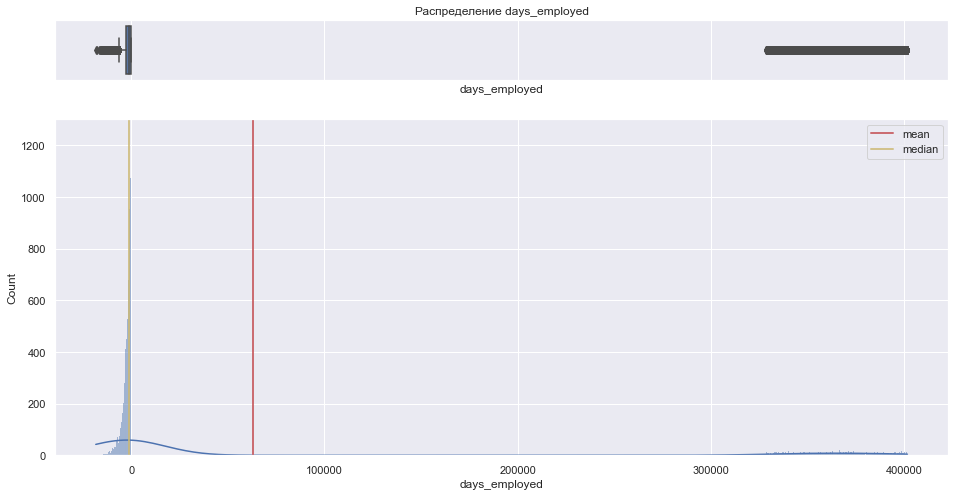

In [9]:
info_row(start_data['days_employed'], start_data)

total_income
count    1.935100e+04
mean     1.674223e+05
std      1.029716e+05
min      2.066726e+04
25%      1.030532e+05
50%      1.450179e+05
75%      2.034351e+05
max      2.265604e+06
Name: total_income, dtype: float64


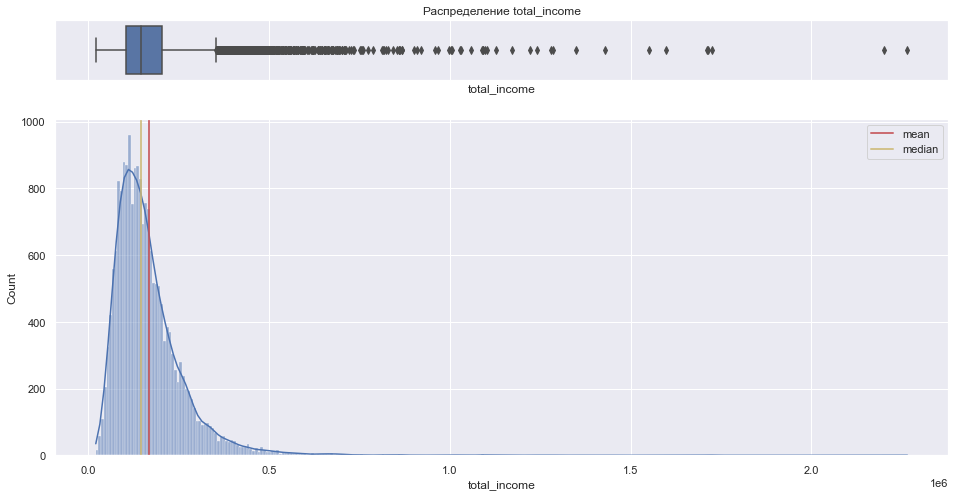

In [10]:
info_row(start_data['total_income'], start_data)

`days_employed` и `total_income` содержат количественные данные и в обоих есть пропуски, причем одинаковое количество. В столбце `days_employed` данные записаны в формате `float64` и многие данные имеют отрицательные значения - необходимо привести данные к формату `int` для отбрасывания дробной части (количество дней не должно быть дробным). Так же надо разобраться почему некоторые значения отрицательные, а другие положительные.
`total_income` для удобства тоже приведем к `int` - кому это надо - считать копейки?!

children
count    21525.000000
mean         0.538908
std          1.381587
min         -1.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         20.000000
Name: children, dtype: float64


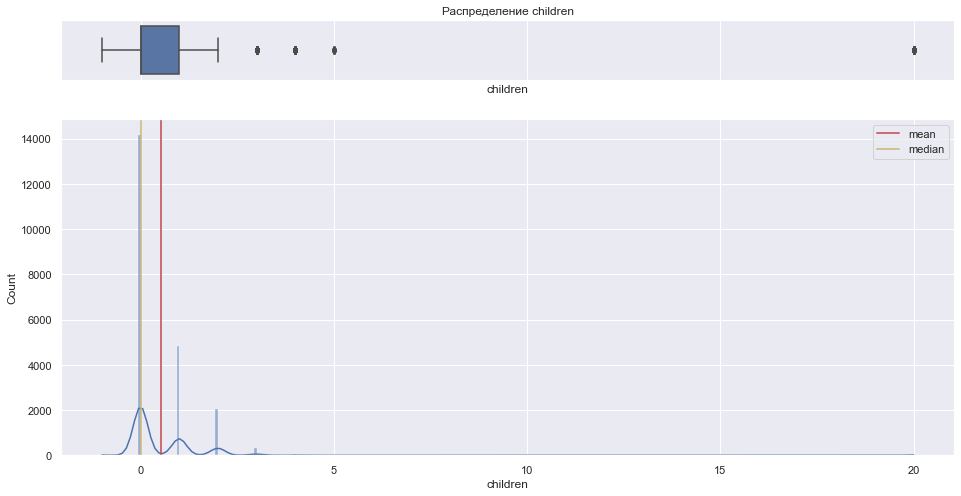

In [11]:
info_row(start_data['children'], start_data)

In [12]:
print('В столбце "children": {} строк со значением "20" и {} строк с отрицательным значением'
      .format(start_data[start_data['children']==20]['children'].count(), 
              start_data[start_data['children']<0]['children'].count()))

В столбце "children": 76 строк со значением "20" и 47 строк с отрицательным значением


Кому-то очень повезло иметь двадцать детей, но нам такой максимум может в дальнейшем помешать, да и выглядит это откровенно подозрительно. И мы соболезнуем тем людям из нашей таблицы, у кого количество детей отрицательное, но пожалуй и эти данные мы позже обработаем отдельно.

dob_years
count    21525.000000
mean        43.293380
std         12.574584
min          0.000000
25%         33.000000
50%         42.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64


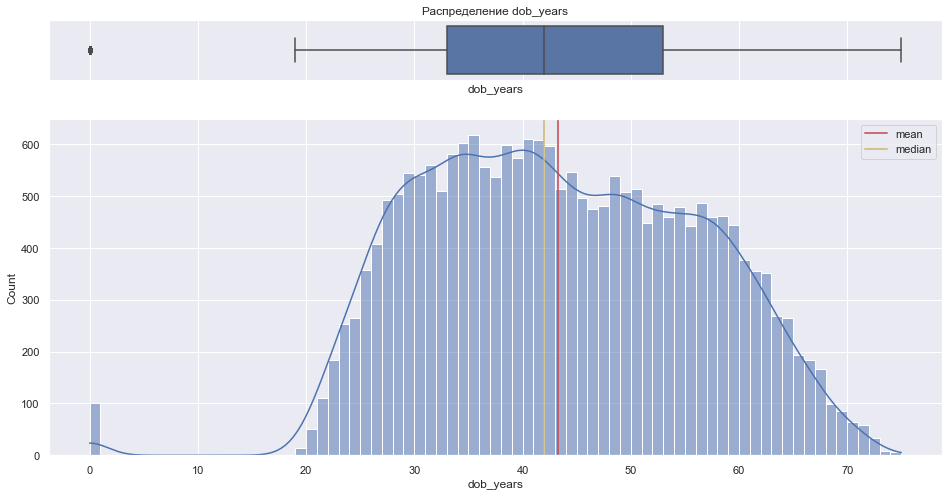

In [13]:
info_row(start_data['dob_years'], start_data, 75)

In [14]:
x = int(start_data[start_data['dob_years']<18]['dob_years'].count()) 
print('В столбце "dob_years" {} строка со значением меньше 18'
      .format(start_data[start_data['dob_years']<18]['dob_years'].count()), end=' ')
print('и это {:.2%} от общего количества строк'.format(x/len(start_data['dob_years'])))

В столбце "dob_years" 101 строка со значением меньше 18 и это 0.47% от общего количества строк


В столбце c возрастом есть нулевые значенияю. Меньше 1% от общего количества - можем их исключить.

In [15]:
print('Уникальные значения в столбце "education": ', start_data['education'].unique(), '\n')

Уникальные значения в столбце "education":  ['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'
 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'
 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'
 'ученая степень'] 



Данные в столбец `education` вводились как попало, надо будет привести их к одинаковому виду.

In [16]:
print('Уникальные значения в столбце "education_id": ', start_data['education_id'].unique(), '\n')

Уникальные значения в столбце "education_id":  [0 1 2 3 4] 



После приведения данных из стоблца `education` к нормальному виду, надо будет сравнить количество уникальных элементов в `education` с тем что у нас есть в `education_id`. Пока явных аномалий не выявленно. 

In [17]:
print('Уникальные значения в столбце "family_status": ', start_data['family_status'].unique())
print('Уникальные значения в столбце "family_status_id": ', start_data['family_status_id'].unique(), '\n')

Уникальные значения в столбце "family_status":  ['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'Не женат / не замужем']
Уникальные значения в столбце "family_status_id":  [0 1 2 3 4] 



Данные в столбцах `family_status` и `family_status_id` не содержат явных искажений/артефактов.

In [18]:
print('Уникальные значения в столбце "gender": ', start_data['gender'].unique(), '\n')
print('Количество тех, кто не "М" и не "Ж": {}'
      .format(start_data[start_data['gender']=='XNA']['gender'].count()))


Уникальные значения в столбце "gender":  ['F' 'M' 'XNA'] 

Количество тех, кто не "М" и не "Ж": 1


Как мы видим есть один человек, который не все решил для себя в этой жизни. Пожалуй позже придется исключить эту строку из таблицы - врядли нам удастся усреднить это значение.

In [19]:
print('Уникальные значения в столбце "income_type":\n', '\n'.join(start_data['income_type'].unique()))

Уникальные значения в столбце "income_type":
 сотрудник
пенсионер
компаньон
госслужащий
безработный
предприниматель
студент
в декрете


В `income_type` с первого взгляда все нормально.

In [20]:
print('Уникальные значения в столбце "debt": ', start_data['debt'].unique(), '\n')

Уникальные значения в столбце "debt":  [0 1] 



`debt` - вероятно имеющиеся задолжности по кредитам. Пока без сюрпризов

In [21]:
print('Уникальные значения в столбце "purpose": \n', start_data['purpose'].unique())


Уникальные значения в столбце "purpose": 
 ['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жилье'
 'операции со своей недвижимостью' 'автомобили' 'заняться образованием'
 'сделка с подержанным автомобилем' 'получение образования' 'автомобиль'
 'свадьба' 'получение дополнительного образования' 'покупка своего жилья'
 'операции с недвижимостью' 'получение высшего образования'
 'свой автомобиль' 'сделка с автомобилем' 'профильное образование'
 'высшее образование' 'покупка жилья для сдачи' 'на покупку автомобиля'
 'ремонт жилью' 'заняться высшим о

`purpose` - в дальнейшем будем использовать, чтобы узнать, на что именно потратили деньги, которые совсем не хочется возвращать.

### Вывод

В нашей таблице нашлось довольно много интересных артефактов. Часть из них мы можем безболезненно удалить, а часть нам предстоить обработать. Есть несколько рабочих гипотез, которые нам предстоить проверить:
1. Интересное начинается уже со строки №4. У нас имеется пенсионер 54 лет отроду трудовой стаж которого представлен положительным числом в отличии от других. 
    - У кого еще стаж положительное число? Гипотеза - у всех кто не работает.
    - 340266 / 365 = 932. Если не учитывать колесо сансары, то такой стаж великоват для нашего пенсионера. А вот если предположить, что это стаж в часах, а не в днях и посчитать 340266 / 24 / 365 = ~38.8 - вот это уже выглядит более правдоподобно. Гипотеза: у всех у кого стаж положительное число, он записан в часах. Надо проверить есть ли аномально большие числа среди отрицательных значений этого столбца.
2. Необходимо привести все строки с категориями образования к единому виду и сравнить количество категорий с количество education_id.
3. Надо обработать аномальные значения в столбцах `gender`, `dob_years`, `children`

## Предобработка данных

### Обработка пропусков <a class="anchor" id="second-bullet"></a>

Перед тем как обрабатывать пропуски нам сначала надо решить вопрос с теми, кто еще не успел пожить, то есть те у кого в графе возраст записан как 0. 

Судя по всему нули в данном случае это маркеры пропусков заполнения значений. Мы можем заменить их на медианные значения для групп сформированных по семейному статусу.

In [22]:
my_lst_before = list(start_data['dob_years'].unique()) 
my_lst_before.sort() 
print('Уникальные значения в столбце "dob_years" до обработки: \n', *my_lst_before)
print()

start_data['dob_years'] = start_data.groupby('family_status')['dob_years'].transform(lambda x: x.replace(0, int(x.median())))

my_lst_after = list(start_data['dob_years'].unique()) 
my_lst_after.sort()
print('Уникальные значения в столбце "dob_years" после обарботки: \n', *my_lst_after)

Уникальные значения в столбце "dob_years" до обработки: 
 0 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75

Уникальные значения в столбце "dob_years" после обарботки: 
 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75


Как мы видим у нас не осталось нулей в столбце с возрастом, после замены на медианные значения.

Предлагаю сразу решить вопрос с артефактами в столбце `children`. Как мы помним у нас есть строки где значение столбца равно 20 и -1. Таких строк тоже не много и можно было бы их просто удалить, но давайте сделаем допущение, что такие данные это ошибка ввода и человек хотел записать просто 1 без минуса и 2 вместо 20. Такое допущение не сильно исказит нашу статистику, но посзволит обработать результаты более верно.

In [23]:
start_data['children'] = start_data['children'].replace(20, 2)
start_data['children'] = start_data['children'].replace(-1, 1)
print('Значения оставшиеся в столбце children: ', *start_data['children'].unique())

Значения оставшиеся в столбце children:  1 0 3 2 4 5


И последний артефакт, от которого нам следует избавиться - **'XNA'** в столбце `gender`. Как мы проверяли раньше, такое значение только одно и мы смело можем удалить эту строку из нашей таблицы.

In [24]:
start_data = start_data.loc[start_data['gender'] != 'XNA']
print('Значения оставшиеся в столбце gender: ', *start_data['gender'].unique())

Значения оставшиеся в столбце gender:  F M


Посмотрим что стало с нашей таблицей после всех манипуляций.

In [25]:
start_data.reset_index(drop=True)
print(start_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21524 non-null  int64  
 1   days_employed     19350 non-null  float64
 2   dob_years         21524 non-null  int64  
 3   education         21524 non-null  object 
 4   education_id      21524 non-null  int64  
 5   family_status     21524 non-null  object 
 6   family_status_id  21524 non-null  int64  
 7   gender            21524 non-null  object 
 8   income_type       21524 non-null  object 
 9   debt              21524 non-null  int64  
 10  total_income      19350 non-null  float64
 11  purpose           21524 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.1+ MB
None


В процессе ознакомления с дата сетом мы узнали, что в столбцах `days_employed` и `total_income` допущенно довольно много пропусков. Для обрабоки количественных значений лучше всего подходит метод заполнения пропущенных значений с помощью медианы или среднего значения. Но перед тем, как приступить к заполнению пропусков следует разобраться с аномалиями в уже имеющихся значениях. Начнем с иследования столбца `days_employed`.

In [26]:
print(start_data['days_employed'].head(10))

0     -8437.673028
1     -4024.803754
2     -5623.422610
3     -4124.747207
4    340266.072047
5      -926.185831
6     -2879.202052
7      -152.779569
8     -6929.865299
9     -2188.756445
Name: days_employed, dtype: float64


Как мы видим в столбце есть как положительные так и отрицательные значения. Мы выдвинули гипотезу, что положительные значения содержаться в тех строках, в которых храняться данные о людях не имевших официальной работы на момент формирования дата сета. Чтобы проверить эту гипотезу выведем группы из столбца `income_type` для которых стаж храниться как положительное число.

In [27]:
days_emp_positive = start_data[start_data['days_employed']>0] 
print(days_emp_positive.groupby('income_type')['days_employed'].count())

income_type
безработный       2
пенсионер      3443
Name: days_employed, dtype: int64


Все положительные значения приходятся на две группы: пенсионеры и безработные. Наша гипотеза оказалась правильной.
Давайте теперь поймем почему положительные значения такие большие? Гипотеза: эти значения записаны в часах, а не в днях. 
Для начала посмотрим действительно ли все положительные значения такие большие?

In [28]:
print('Максимальное положительное значение в столбце `days_employed`:', days_emp_positive['days_employed'].max())
print('Минимальное положительное значение в столбце `days_employed`:', days_emp_positive['days_employed'].min())

Максимальное положительное значение в столбце `days_employed`: 401755.40047533
Минимальное положительное значение в столбце `days_employed`: 328728.72060451825


328728 / 365 = **~900.62**. Триста тысяч дней это **больше девятиста лет!**. Сомнительное значение для стажа. Попробуем поделить это значение еще на 24 часа: 900 / 24 = ~37.5 - это значение выглядит куда более правдаподобно, учитывая, что почти все у кого стаж записан в таком формате - пенсионеры, а значит и стаж у них большой. 
Решено - положительные значения пересчитываем в днях.

In [29]:
def days_empl_to_days(row):
    if row['days_employed'] > 0:
        return row['days_employed'] / 24
    return row['days_employed']

start_data['days_employed'] = start_data.apply(days_empl_to_days, axis=1)
display(start_data)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,14177.753002,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,14330.725172,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


Теперь можно заняться заполнением пропусков. Для количественных данных лучше всего подходит метод замены на характерные значения. Для нашей задачи лучше всего подойдет замена на медиану. Пропущенные значения у нас остались в столбцах `days_employed` и `total_income`. Начнем с первого. Для него медиану стоит счиать по группам, составленным на основании возраста.
Но у нас в столбце `days_employed` остались отрицательные значения. Разберемся сначала с этой проблеммой применив метод `.abs()`, который возвращает модуль значения.

In [30]:
start_data['days_employed'] = start_data['days_employed'].abs()
display(start_data.head())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,14177.753002,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


Теперь можно сформировать группы по возрасту и посчитать для них медиану. У нас будут следующие группы:
- 18-25 лет - начинающие карьеру
- 26-35 лет - рассвет
- 36-45 лет - профессионалы
- 46-55 лет - наставники
- \>56 лет - пенсионеры

In [31]:
def grouping_by_experience(row): #функция для группировки значений по возрасту
    if row['dob_years'] <=25:
        return 'начинающие карьеру'
    elif row['dob_years'] <=35:
        return 'рассвет'
    elif row['dob_years'] <=45:
        return 'профессионалы'
    elif row['dob_years'] <=55:
        return 'наставники'
    return 'пенсионеры'

def median_by_experience(row):
    if row['days_employed'] == 'dummy_value':
        mediana = medians_by_age[row['experience']]
        return mediana
    return row['days_employed']

start_data['experience'] = start_data.apply(grouping_by_experience, axis=1) #создаем новый столбец со значениями группировки по возрасту

#создадим словарь и запеишем в него значения вида (группа : медиана для этой группы)
medians_by_age = {}
for i in list(start_data['experience'].unique()):
    medians_by_age[i] = start_data.loc[start_data.loc[:,'experience'] == i]['days_employed'].sort_values(ascending=False).median()
print(medians_by_age)

start_data['days_employed'].fillna('dummy_value', inplace=True) #заполним все пропущеные значения строкой 'dummy_value'
print(start_data.info()) #Посмотрим, что теперь столбец `days_employed` содержит тип данных object, так как там есть и значения float и str

start_data['days_employed'] = start_data.apply(median_by_experience, axis=1) #применим нашу функцию, чтобы заменить все 'dummy_value' на медианы согласно категориям
print(start_data.info()) #Теперь мы увидим что все значения в столбце имеют тип float, значит наша замена удалась

{'профессионалы': 1907.9660088950259, 'рассвет': 1350.995299700644, 'наставники': 2885.1421882674586, 'пенсионеры': 14500.395455276399, 'начинающие карьеру': 797.2877345379686}
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21524 non-null  int64  
 1   days_employed     21524 non-null  object 
 2   dob_years         21524 non-null  int64  
 3   education         21524 non-null  object 
 4   education_id      21524 non-null  int64  
 5   family_status     21524 non-null  object 
 6   family_status_id  21524 non-null  int64  
 7   gender            21524 non-null  object 
 8   income_type       21524 non-null  object 
 9   debt              21524 non-null  int64  
 10  total_income      19350 non-null  float64
 11  purpose           21524 non-null  object 
 12  experience        21524 non-null  object 
dtypes: f

Наконец все пропущенные значения в столбце `days_employed` заменены на медианные значения согласно возврастным группам. 

Теперь нам необходимо обработать пропущенные значения в столбце `total_income`. Действовать будем аналогично предыдущему блоку кода, только группировать значения будем по столбцу `income_type`. 

In [32]:
group_income = start_data.groupby('income_type')['total_income'].median()
group_income

income_type
безработный        131339.751676
в декрете           53829.130729
госслужащий        150447.935283
компаньон          172319.266339
пенсионер          118514.486412
предприниматель    499163.144947
сотрудник          142594.396847
студент             98201.625314
Name: total_income, dtype: float64

In [33]:
for i in group_income.index:
    start_data.loc[(start_data['income_type'] == i) & (start_data['total_income'].isnull()), 'total_income'] = group_income[i]

Чтобы не оставлять на потом, давайте еще введем категории для уровня заработка. Для имеющихся данных лучше всего подойдет разбиение групп основываясь на квартилях:
- все что до 1 квартиля (25%) — низкий доход
- между 1 квартилью и мединой (2 квартиль) — средний доход
- от медианы до 3 квартиля (25%) — выше среднего
- все что дальше 3 квартиля — высокий доход.

Посмотрим на квартили:

In [34]:
print(start_data['total_income'].quantile([0.25,0.5,0.75]))

0.25    107795.976532
0.50    142594.396847
0.75    195545.200922
Name: total_income, dtype: float64


In [35]:
def total_income_change(total_income):        
    if total_income < start_data['total_income'].quantile(0.25):
        return 'низкий доход'
    if start_data['total_income'].quantile(0.25) <= total_income < start_data['total_income'].quantile(0.5):
        return 'средний доход'
    if start_data['total_income'].quantile(0.5) <= total_income < start_data['total_income'].quantile(0.75) :
        return 'выше среднего'
    return 'высокий доход'

start_data['total_income_new'] = start_data['total_income'].apply(total_income_change)

In [36]:
start_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21524 non-null  int64  
 1   days_employed     21524 non-null  float64
 2   dob_years         21524 non-null  int64  
 3   education         21524 non-null  object 
 4   education_id      21524 non-null  int64  
 5   family_status     21524 non-null  object 
 6   family_status_id  21524 non-null  int64  
 7   gender            21524 non-null  object 
 8   income_type       21524 non-null  object 
 9   debt              21524 non-null  int64  
 10  total_income      21524 non-null  float64
 11  purpose           21524 non-null  object 
 12  experience        21524 non-null  object 
 13  total_income_new  21524 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 2.5+ MB


#### Вывод

Все пропущенные значения относятся к столбцам с количественными переменными. 
Вероятнее всего во время сбора данных информация была не предоставлена или не внесена в базу.
Для обработки таких пропусков хорошо подходит метод подстановки характерных значений на места пропусков. 
Чтобы снизить влияние такой подстановки на результат анализа заменим пропущенные значения на медиану 
имеющихся в колонке значений, и для ее поиска воспользуемся методом **.median()**. Чтобы расчет был более честным, медиану мы будем искать по группам.
Но перед этим необходимо избывиться от отрицательных значений в столбце `days_employed` (которые тоже очевидно являются ошибкой ввода), чтобы правильно посчитать медиану. Метод **.abs()** - наш выбор!

После обработки наших данных у нас не осталось пропущенных значений, мы заменили их на медианы посчитанные для групп с примерно одинаковыми признаками. Теперь мы можем продолжить работу с таблицей.

### Замена типа данных 

Количество дней из колонки `days_employed` и общий доход из `total_income` надо привести к типу int64, так как количество дней проработанных человеком врядли может быть дробным числом, а отбрасывание копеек в зарплате упростит нам работу с таблицей и не повлияет на результат. Для изменения типов используем метод **.astype()**. Передадим ему в качестве аргумента словарь, где ключи это названия столбцов, а значения - тип, к которому мы хотим привести данные.

In [37]:
start_data['days_employed'] = start_data['days_employed'].astype(int)
start_data = start_data.astype({"days_employed": int, "total_income": int})
display(start_data.head())
print(start_data.info())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,experience,total_income_new
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,профессионалы,высокий доход
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,профессионалы,средний доход
2,0,5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,рассвет,выше среднего
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,рассвет,высокий доход
4,0,14177,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,наставники,выше среднего


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21524 non-null  int64 
 1   days_employed     21524 non-null  int32 
 2   dob_years         21524 non-null  int64 
 3   education         21524 non-null  object
 4   education_id      21524 non-null  int64 
 5   family_status     21524 non-null  object
 6   family_status_id  21524 non-null  int64 
 7   gender            21524 non-null  object
 8   income_type       21524 non-null  object
 9   debt              21524 non-null  int64 
 10  total_income      21524 non-null  int32 
 11  purpose           21524 non-null  object
 12  experience        21524 non-null  object
 13  total_income_new  21524 non-null  object
dtypes: int32(2), int64(5), object(7)
memory usage: 2.3+ MB
None


### Обработка дубликатов <a class="anchor" id="fourth-bullet"></a>

Перед обработкой дубликатов нам необходимо разобраться с данными в столбце `education`. Но перед этим посмотрим сколько дубликатов в наших данных на данный момент.

In [38]:
start_data.duplicated().sum()

55

In [39]:
print('Уникальные значения в столбце "education": ', start_data['education'].unique())

Уникальные значения в столбце "education":  ['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'
 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'
 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'
 'ученая степень']


Как мы видим кто-то из заполнявших данные считает, что лишь ВЫСШЕЕ образование достойно заглавных букв, а кто-то наоборот делает упор на среднее. Исправим это неравноправие приведением всех значений к нижнему регистру.

In [40]:
start_data['education'] = start_data['education'].str.lower()

Проверим сколько теперь уникальных значений содержится в этом столбце

In [41]:
print('Уникальные значения в столбце "education": ', start_data['education'].unique())

Уникальные значения в столбце "education":  ['высшее' 'среднее' 'неоконченное высшее' 'начальное' 'ученая степень']


Теперь когда у нас любое образование ценится одинаково проверим сколько в таблице "грубых повторов"

In [42]:
print('В таблице содержится {} "грубых" повторов'.format(start_data.duplicated().sum()))

В таблице содержится 72 "грубых" повторов


Не так уж и много. Можно смело от них избавляться

In [43]:
start_data = start_data.drop_duplicates().reset_index(drop=True)
print('После применения метода .drop_duplicates() осталось {} "грубых" повторов'.format(start_data.duplicated().sum()))

После применения метода .drop_duplicates() осталось 0 "грубых" повторов


#### Вывод

Перед тем как удалять повторы мы убедились, что во всех столбцах у нас нет разночтения регистров, которое могло возникнуть при введении данных, их загрузки в систему или в результате того, что человек несколько раз подавал заявку на кредит.

Связкой методов **.duplicated().sum()** проверим наличие в таблице грубых повторов. При имеющихся данных в таблице мы можем предположить, что она не должна содержать полностью повторяющихся строк (нет двух человек для которых все данные были бы одинаковы). Поэтому мы можем смело избавиться от повторных строк методом **.drop_duplicates()**. Чтобы индексация в таблице не "поехала" к предыдущему методу добавляем метод **reset_index(drop=True)**

### Лемматизация <a class="anchor" id="fifth-bullet"></a>

Из всех столбцов нам надо лемматизировать только `purpose`, ведь именно в нем содержаться данные, которые будет очень сложно стандартизировать без предварительной обработки. В данном случае лемматизация упростит разбивку категорий на группы.

In [44]:
def lemmatization(clmn : pd.Series):
    '''Эта функция принимает на вход столбец в котором содежаться значения, которые мы хочем лемматизировать.
    После этого она собирает из всех значений одну большую строку вставляя между ними наш разделитель <br>. Далее мы производим
    лемматизицию во время которой снова собираем все значения в одну строку. Далее мы разбиваем эту строку по нашему разделителю
    и получаем массив со всеми проллематизированными значениями. Функция возвращает Series с новыми значениями'''
    m = Mystem()
    result = str()
    for i in clmn:
        result += i + '<br>'
    result = ''.join(m.lemmatize(result)) 
    return pd.Series(result.split('<br>'))

print(start_data['purpose'].unique())
start_data['purpose'] = lemmatization(start_data.loc[:, ('purpose')])

print(start_data['purpose'].unique()) #посмотрим, что получилось

print('\nПосле применения метода лемматизации в столбце осталось {} уникальных категорий'.format(
    start_data['purpose'].value_counts().count()))

['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жилье'
 'операции со своей недвижимостью' 'автомобили' 'заняться образованием'
 'сделка с подержанным автомобилем' 'получение образования' 'автомобиль'
 'свадьба' 'получение дополнительного образования' 'покупка своего жилья'
 'операции с недвижимостью' 'получение высшего образования'
 'свой автомобиль' 'сделка с автомобилем' 'профильное образование'
 'высшее образование' 'покупка жилья для сдачи' 'на покупку автомобиля'
 'ремонт жилью' 'заняться высшим образованием']
['покупка жилье' 'приобретени

Лемматизация позволила нам подготовить список уникальных категорий для дальнейшей разбивки на более крупные группы. Ведь желания "купить автомобиль", "автомобиль" и "свой автомобиль" по-сути одно и то же.

### Категоризация данных <a class="anchor" id="sixth-bullet"></a>

Ранее мы уже выделили некоторые категории перед тем, как заполнять пропуски. Теперь нам надо добавить категории по целям кредита. Для начала соберем словарь где ключами будут начальные формы слов из уникальных значений столбца `purpose`, а значениями - количество их повторений.

In [45]:
'''произведем стемминг значений из столбца `purpose` и соберем полученные значения в list'''

from nltk.stem import SnowballStemmer
russian_stemmer = SnowballStemmer('russian')

stemmed_words = []
for query in start_data['purpose'].unique():
    for word in query.split():
        stemmed_word = russian_stemmer.stem(word)
        stemmed_words.append(stemmed_word)
stemmed_words.sort()
print(stemmed_words)

stemmed_words_counts = {}
for word in stemmed_words:
    stemmed_words_counts[word] = stemmed_words.count(word)

print('\n', stemmed_words_counts)

['автомобил', 'автомобил', 'автомобил', 'автомобил', 'автомобил', 'автомобил', 'автомобил', 'автомобил', 'высок', 'высок', 'высок', 'для', 'для', 'дополнительн', 'дополнительн', 'жил', 'жил', 'жил', 'жил', 'жил', 'жил', 'жил', 'жил', 'жил', 'занима', 'занима', 'коммерческ', 'коммерческ', 'на', 'на', 'на', 'на', 'недвижим', 'недвижим', 'недвижим', 'недвижим', 'недвижим', 'недвижим', 'недвижим', 'недвижим', 'недвижим', 'недвижим', 'образован', 'образован', 'образован', 'образован', 'образован', 'образован', 'образован', 'образован', 'образован', 'операц', 'операц', 'операц', 'операц', 'подержа', 'подержа', 'покупк', 'покупк', 'покупк', 'покупк', 'покупк', 'покупк', 'покупк', 'покупк', 'покупк', 'покупк', 'получен', 'получен', 'получен', 'приобретен', 'проведен', 'профильн', 'ремонт', 'с', 'с', 'с', 'с', 'с', 'свадьб', 'свадьб', 'свадьб', 'сво', 'сво', 'сво', 'сво', 'сдач', 'сделк', 'сделк', 'сем', 'со', 'собствен', 'строительств', 'строительств', 'строительств', 'сыгра']

 {'автомобил': 

Методом осмотра значений выделим следующие категории:
- автомобиль
- жилье
- коммерческая недвижимость
- образование
- свадьба

Теперь нам надо создать новый столбец, в который мы запишем выделеные категории для каждой строки.

In [46]:
def grouping_by_purpose(row):
    if 'автомобил' in row['purpose']:
        return 'автомобиль'
    if 'коммерческ' in row['purpose']:
        return 'коммерческая недвижимость'
    elif 'образован' in row['purpose']:
        return 'образование'
    elif 'свадьб' in row['purpose']:
        return 'свадьба'
    elif 'жил' or 'недвижим' in row['purpose']:
        return 'жилье'
    else:
        return 'unknown'
    
start_data['purpose_cattegory'] = start_data.apply(grouping_by_purpose, axis=1)
display(start_data.head())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,experience,total_income_new,purpose_cattegory
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилье,профессионалы,высокий доход,жилье
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиль,профессионалы,средний доход,автомобиль
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилье,рассвет,выше среднего,жилье
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительный образование,рассвет,высокий доход,образование
4,0,14177,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьба,наставники,выше среднего,свадьба


Интересно посмотреть сколько значений приходится на каждую категорию.

In [47]:
print(start_data.groupby('purpose_cattegory')['purpose'].count())

purpose_cattegory
автомобиль                   4306
жилье                        9499
коммерческая недвижимость    1311
образование                  4013
свадьба                      2323
Name: purpose, dtype: int64


#### Вывод

Мы собрали цели кредитования по пяти основным категориям. Интересно, что выделение коммерческой недвижимости в отдельную категорию имело большой смысл, так как таких заявок оказалось довольно много. И согласитесь, что покупка коммерческой недвижимости это не тоже самое, что купить себе место, которое можно называть домом. Можно было бы немного перераспределить категории за счет того, что покупка жилья для сдачи это тоже скорее коммерческая недвижимость. Но в этот раз мы так углубляться не будем.

## Анализ полученных данных и выводы <a class="anchor" id="seventh-bullet"></a>

Для анализа полученных результатов напишем функцию, которой будем передовать название столбца с категориальными данными. Эта функция будет выводить график с количеством невозвращенных кредитов по категориям столбца и таблицу с численными значениями.

In [48]:
def pivot(data, index):
    
    pivot = data.pivot_table(index = index, values = 'debt', aggfunc = ['count', 'sum', 'mean']).reset_index()
    pivot.columns = [index, 'Кол-во клиентов', 'Кол-во должников', '% невозврата']
    pivot['% невозврата'] = (pivot['% невозврата'] * 100).round(2)
    
    
    display(pivot.sort_values('% невозврата', ascending = True))
    plt.subplots(figsize=(10, 6))
    
    fig = sns.barplot(x=index, y='% невозврата', data=pivot)
    for p in fig.patches:
        fig.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom', color= 'black')    

### Есть ли зависимость между наличием детей и возвратом кредита в срок?

Для анализа зависимости возврата кредита от количества детей введем дополнительную классификацию:
* 0 детей - бездетные
* 1-2 ребенка - малодетные
* 3 и больше - многодетные

In [49]:
def family_child_classifier(row):
    if row['children'] == 0:
        return 'бездетные'
    elif row['children'] < 3:
        return 'малодетные'
    return 'многодетные'

start_data['fam_stat_by_children'] = start_data.apply(family_child_classifier, axis=1)

,fam_stat_by_children,Кол-во клиентов,Кол-во должников,% невозврата
0,бездетные,14089,1063,7.54
2,многодетные,380,31,8.16
1,малодетные,6983,647,9.27


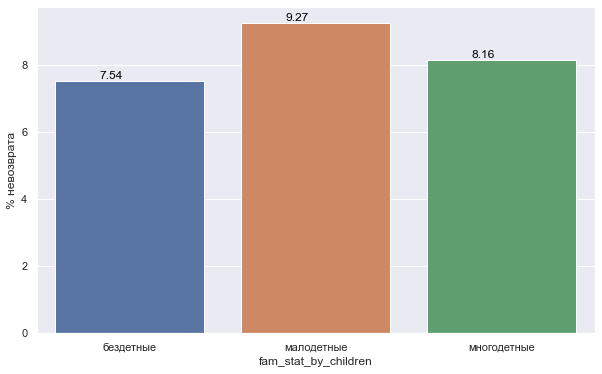

In [50]:
pivot(start_data, 'fam_stat_by_children')

,children,Кол-во клиентов,Кол-во должников,% невозврата
5,5,9,0,0.00
0,0,14089,1063,7.54
3,3,330,27,8.18
1,1,4855,445,9.17
2,2,2128,202,9.49
4,4,41,4,9.76


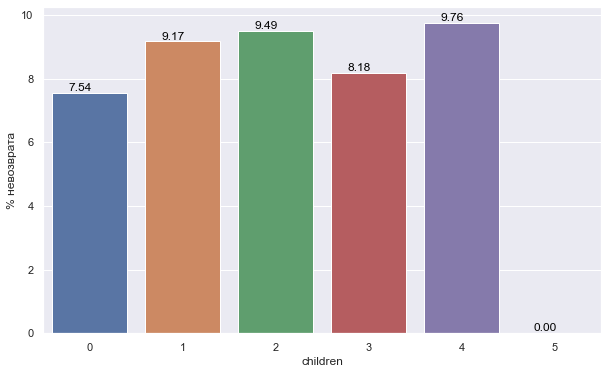

In [51]:
pivot(start_data, 'children')

**Вывод**

Как видно из графиков, наличие детей ощутимо (почти на 2%) увеличивает возможность просрочки по кредиту. Среди тех, у кого есть дети самая безопасная группа - семьи с тремя детьми.

### Есть ли зависимость между семейным положением и возвратом кредита в срок?

,family_status,Кол-во клиентов,Кол-во должников,% невозврата
2,вдовец / вдова,959,63,6.57
1,в разводе,1195,85,7.11
4,женат / замужем,12339,931,7.55
3,гражданский брак,4149,388,9.35
0,Не женат / не замужем,2810,274,9.75


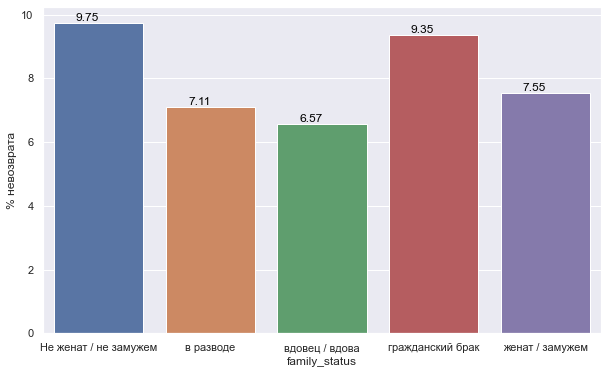

In [52]:
pivot(start_data, 'family_status')

**Вывод**

Если смотреть отдельно на столбец `debt` может показаться, что одинокие люди более ответсвенны. Но настоящий результат мы получаем, только когда сравним количество заявок с количеством просрочек. Люди, которые не состоят в официальных отношениях и никогда не состояли хуже возвращают кредиты, в отличии от семей, которые имеют официальный статус, пусть даже когда-то в прошлом.

### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

,total_income_new,Кол-во клиентов,Кол-во должников,% невозврата
0,высокий доход,5381,386,7.17
2,низкий доход,5381,427,7.94
1,выше среднего,6298,543,8.62
3,средний доход,4392,385,8.77


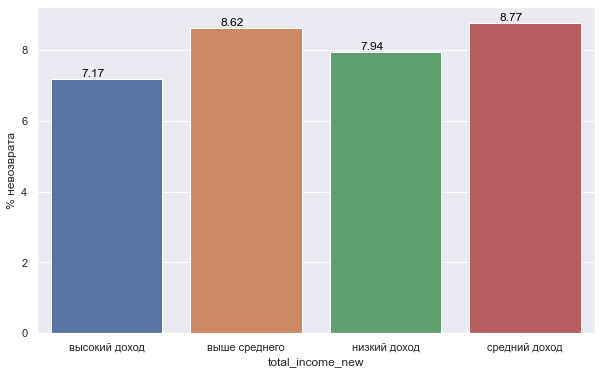

In [53]:
pivot(start_data, 'total_income_new')

**Вывод**

Контринтуитивно, но люди с самым низким доход возвращают заемные средства почти так же хорошо как и те у кого самые большие зарплаты. А вот те кто имеют средний доход и выше среднего не так ответственны и чаще допускают просрочки.

### Как разные цели кредита влияют на его возврат в срок?

,purpose_cattegory,Кол-во клиентов,Кол-во должников,% невозврата
1,жилье,9499,683,7.19
2,коммерческая недвижимость,1311,99,7.55
4,свадьба,2323,186,8.01
3,образование,4013,370,9.22
0,автомобиль,4306,403,9.36


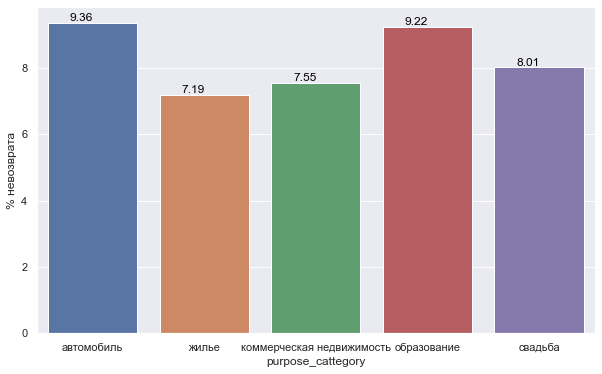

In [54]:
pivot(start_data, 'purpose_cattegory')

**Вывод**

Самое ответственное отношение к долгам у тех, кто взял деньги на жилье. Оно и понятно, ведь никто не хочет чтобы банк выгнал его из дома. А вот к заемным средствам на автомобиль относятся более легкомысленно. Еще важно отметить, что образование не гарантирует хороший и стабильный доход с самого начала.

Личный инсайт - те кто брал денбги на свадьбу не самые плохие должники.

## Общий вывод

Посмотрим сколько всего просрочек допущенно для всех категорий.

In [55]:
print('От общего количества кредитов не вернули в срок {:.2%}'.format(start_data['debt'].sum() / start_data.shape[0]))

От общего количества кредитов не вернули в срок 8.12%


В среднем просрочки допускаются в 8 случаях из 100. 

Как видно из изученых данных % невозврата между разными категориями не очень велик, но для банка даже небольшое отклонение может быть существенно, поэтому каждый из факторов значим. Их можно классифицировать по степени отклонения от среднего % невозврата на «низкий \ средний \ высокий риск», но опять же чтобы понять диапазоны отклонений нужна консультация специалиста банка. Однако к примеру, если говорить о детях, то семьи без детей имеют низкий риск, малодетные высокий, а многодетные средний.

P.s. Стоит отметить, что для составления более объективного портрета нужно изучать совокупность признаков. Ты конечно можешь провести дополнительную группировку например статус-пол, цель-доход и тд, но все же все наборы не переберем, и тут вступает в игру машинное обучение и модели классификации, которые как раз таки решают задачи кредитного скоринга.